# Теория вероятностей и математическая статистика
## Практикум 2


**Правила:**

* Дедлайн **14 ноября 23:59**. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить на почту MarkashevaVA@mgppu.ru, указав тему письма `"Практикум 2[номер группы] Фамилия Имя"`. Квадратные скобки обязательны.
* Прислать нужно ноутбук и его pdf-версию (без архивов). Названия файлов должны быть такими: `N.ipynb` и `N.pdf`, где `N` - ваш  номер в журнале группы и ФИО(нумерация начинается с 01,02,03... и т.д.)
* Решения, размещенные на каких-либо интернет-ресурсах не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлению возможности списать.
* Для выполнения задания используйте этот ноутбук в качествие основы, ничего не удаляя из него.


*НЕЛЬЗЯ ИСПОЛЬЗОВАТЬ ЦИКЛЫ, кроме самых отчаянных ситуаций.

**Баллы за задание:**

-отлично, если все сдано вовремя, без ошибок и код содержит оригинальные элементы, и НЕ содержит циклов


-Хорошо, если все сдано вовремя, без ошибок и НЕ содержит циклов


-Удовлетворительно, если все сдано вовремя, все задачи кроме одной решены правильно, без ошибок и код НЕ содержит циклов


-Неудовлетворительно, если в коде ЕСТЬ хотя бы один цикл, или допущены грубые ошибки в более чем одной задаче, и/или код не работает, или сдано невовремя


Весь код в авторском решении задания выполняется за полминуты.

In [72]:
import numpy as np
import scipy.stats as sps
import ipywidgets as widgets
import matplotlib.pyplot as plt

%matplotlib inline

**Задача 1.** В этой задаче вам нужно исследовать свойства плотности для указанных распределений.

Для перечисленных ниже распределений нужно
1). Построить график плотности для каждого распределения
2). На основе графиков плотности для различных параметров пояснить, за что отвечает каждый параметр.
3). Создать виджеты для демонстрации изменения графика, когда изменяется параметр

Распределения:
* Нормальное (для этого распределения ниже дается большая часть кода, решение также было разобрано на презентации)
* Равномерное (напрерывное равномерное)
* Экспоненциальное 
* Гамма-распределение (при $\alpha=1,\beta=2$ в соответствии с обозначениями конспекта лекций)
* Распределение Коши

Для желающих углубленно разобраться также с Бета-распределением.

**Часть 1.**

In [73]:
#Функция, рисующая график плотности с заданными параметрами
def show_pdf(pdf, xmin, xmax, ymax, grid_size=100, **kwargs):
    """
    Рисует график плотности непрерывного распределения
    pdf -- плотность
    xmin, xmax -- границы графика по оси x
    ymax -- граница графика по оси y
    grid_size -- размер сетки, по которой рисуется график
    kwargs -- параметры плотности
    """
    
    grid = np.linspace(xmin, xmax, grid_size)
    
    plt.figure(figsize=(14, 5))
    plt.plot(grid, pdf(grid, **kwargs), lw=3)
    plt.grid(ls=':')
    plt.xlim((xmin, xmax))
    plt.ylim((None, ymax))
    plt.show()

Пример работы функции для плотности нормального распределения $\mathcal{N}(0, 0.85^2)$

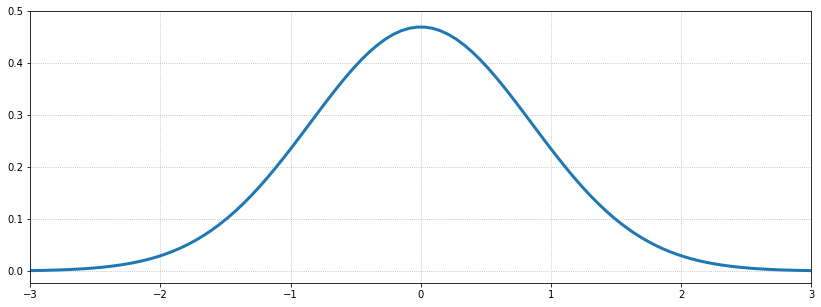

In [74]:
#График плотности Нормального распределения
show_pdf(sps.norm.pdf, -3, 3, 0.5, loc=0, scale=0.85)

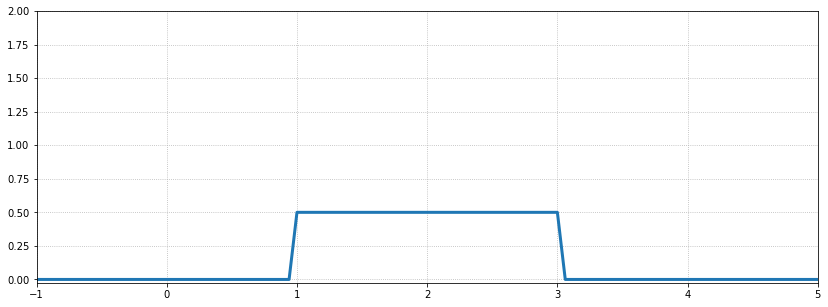

In [7]:
show_pdf(sps.uniform.pdf, -1, 5, 2, loc=1, scale=2)

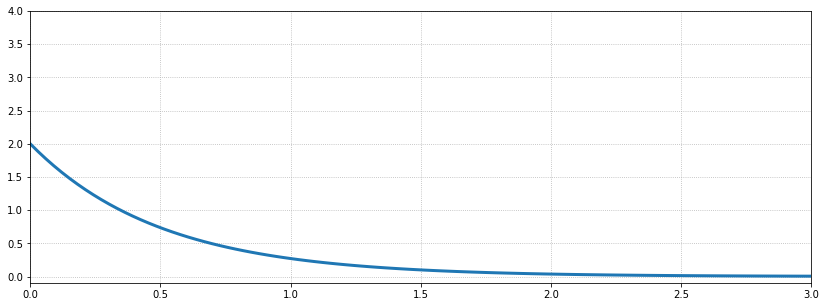

In [10]:
show_pdf(sps.expon.pdf, 0, 3, 4, loc=0, scale=0.5)

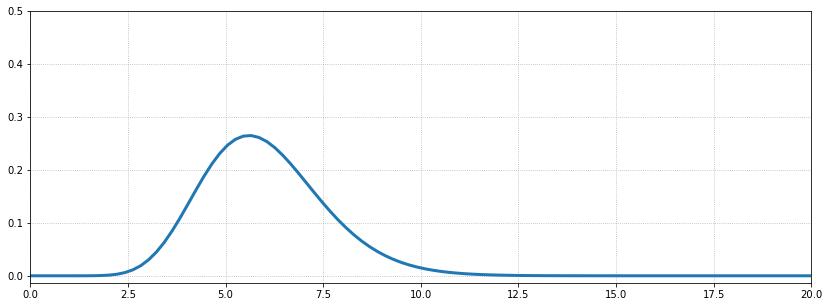

In [14]:
show_pdf(sps.gamma.pdf, 0, 20, 0.5, a=15, loc=0, scale=0.4)

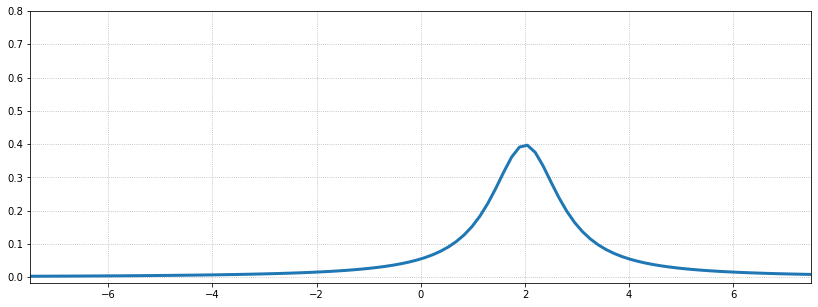

In [19]:
show_pdf(sps.cauchy.pdf, -7.5, 7.5, 0.8, loc = 2, scale = 0.8)

**Часть 2.** В одном графике смену параметров передать не получится, поэтому нарисуйте еще несколько плотностей на одном графике, как это сделано ниже для нормального распределения.

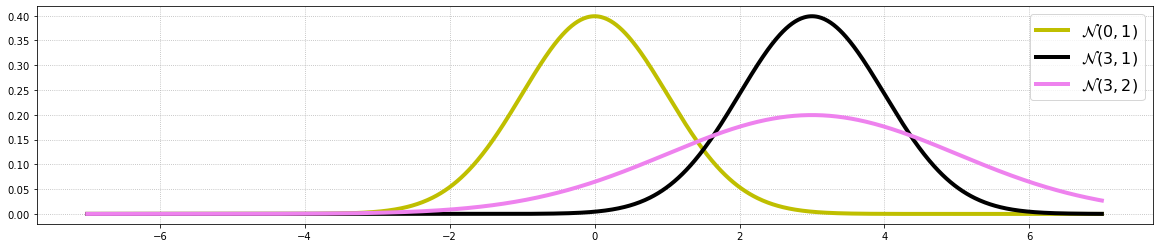

In [27]:
grid = np.linspace(-7, 7, 1000)  # сетка для построения графика
a_list = [0, 3, 3]  # набор значений параметра a
sigma_list = [1, 1, 2]  # набор значений параметра sigma

plt.figure(figsize=(20, 4))
for i, (a, sigma, color) in enumerate(zip(a_list, sigma_list, ['y', 'black', 'violet'])):
    plt.plot(grid, sps.norm(a, sigma).pdf(grid), color=color, lw=4, 
             label='$\mathcal{N}' + '({}, {})$'.format(a, sigma))
plt.legend(fontsize=16)
plt.grid(ls=':')
plt.show()

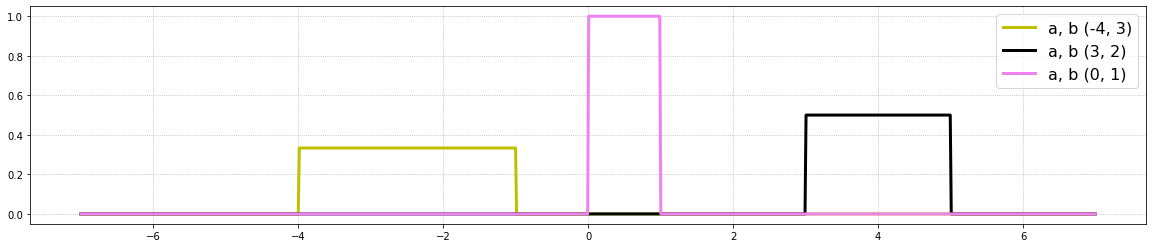

In [35]:
#Непрерывное равномерное распределение
grid = np.linspace(-7, 7, 1000)  # сетка для построения графика
a_list = [-4, 3, 0]  # набор значений параметра a
b_list = [3, 2, 1]  # набор значений параметра b
plt.figure(figsize=(20, 4))
for i, (a, b, color) in enumerate(zip(a_list, b_list, ['y', 'black', 'violet'])):
    plt.plot(grid, sps.uniform(a, b).pdf(grid), color=color, lw=3, 
             label='a, b ' + '({}, {})'.format(a, b))
plt.legend(fontsize=16)
plt.grid(ls=':')
plt.show()

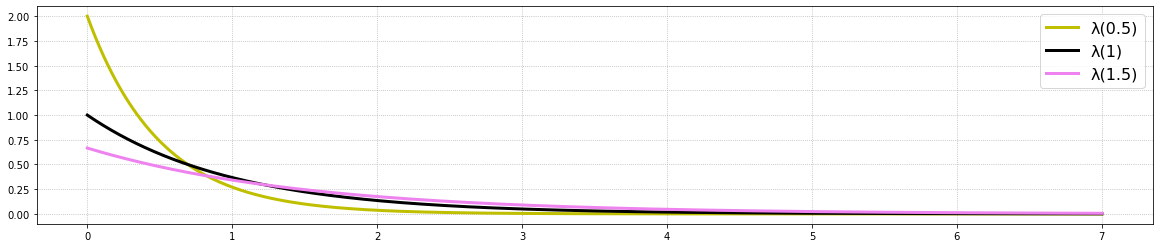

In [137]:
#Экспоненциальное распредление
grid = np.linspace(0, 7, 1000)  # сетка для построения графика
lambda_list = [0.5, 1, 1.5]  # набор значений параметра Лямбда
plt.figure(figsize=(20, 4))
for i, (a, color) in enumerate(zip(lambda_list, ['y', 'black', 'violet'])):
    plt.plot(grid, sps.expon.pdf(grid, 0, a), color=color, lw=3, 
             label='λ' + '({})'.format(a))
plt.legend(fontsize=16)
plt.grid(ls=':')
plt.show()

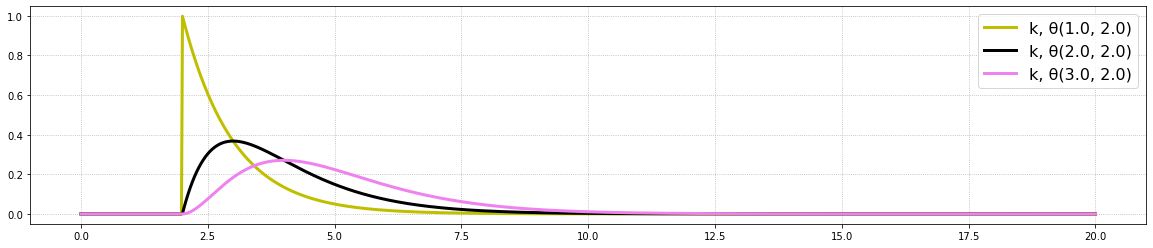

In [46]:
#Гамма-распределение
grid = np.linspace(0, 20, 1000)  # сетка для построения графика
k_list = [1.0, 2.0, 3.0]  # набор значений параметра k
O_list = [2.0, 2.0, 2.0]  # набор значений параметра O
plt.figure(figsize=(20, 4))
for i, (k, O, color) in enumerate(zip(k_list, O_list, ['y', 'black', 'violet'])):
    plt.plot(grid, sps.gamma(k, O).pdf(grid), color=color, lw=3, 
             label='k, θ' + '({}, {})'.format(k, O))
plt.legend(fontsize=16)
plt.grid(ls=':')
plt.show()

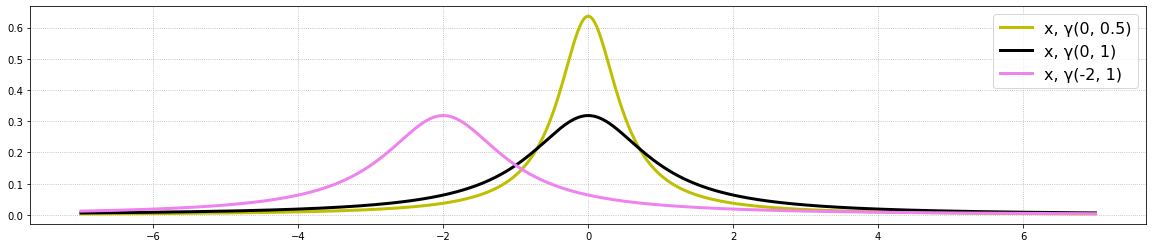

In [48]:
#Распределение Коши
grid = np.linspace(-7, 7, 1000)  # сетка для построения графика
x_list = [0, 0, -2]  # набор значений параметра Х (сдвиг)
gamma_list = [0.5, 1, 1]  # набор значений параметра Гамма
plt.figure(figsize=(20, 4))
for i, (x, gam, color) in enumerate(zip(x_list, gamma_list, ['y', 'black', 'violet'])):
    plt.plot(grid, sps.cauchy(x, gam).pdf(grid), color=color, lw=3, 
             label='x, γ' + '({}, {})'.format(x, gam))
plt.legend(fontsize=16)
plt.grid(ls=':')
plt.show()

**Вывод:**
Для нормального распределения:
* параметр $a$ отвечает за сдвиг по OX;
* параметр $\sigma$ отвечает за коэффициент масштаба.

Для Непрерывного равномерного распределения:
* параметр a отвечает за сдвиг по OX;
* параметр b-a отвечает за коэффициент масштаба.

Для Экспоненциального распределения:
* параметр λ играет роль обратного коэффициента масштаба.

Для Гамма-распределения:
*-

Для распределения Коши:
* параметр Хо отвечает за сдвиг по OX;
* параметр γ выступает в роли коэффициента масштаба.

**Часть 3.** Ниже приведен пример создания виджета для нормального распределения.
**НО** вы должны построить виджеты **для параметров распределения,** то есть в случае нормального распределения это параметры $a$ и $\sigma$. Для каждого вида распределений свои параметры или параметр.
*ПЕРЕДЕЛАЙТЕ ВИДЖЕТЫ, ЗАПРОГРАММИРОВАННЫЕ НИЖЕ*

О том, что такое виджеты и как заставить их работать, см. в инструкциях к библиотеках на странице курса.

In [54]:
# Нормальное распределение
ip = widgets.interactive(show_pdf, pdf=widgets.fixed(sps.norm.pdf),
                         grid_size=widgets.IntSlider(min=25, max=300, step=25, value=100),
                         xmin=widgets.FloatSlider(min=-10, max=0, step=0.1, value=-5),
                         xmax=widgets.FloatSlider(min=0, max=10, step=0.1, value=5),
                         ymax=widgets.FloatSlider(min=0, max=2, step=0.1, value=1),
                         loc=widgets.FloatSlider(min=-10, max=10, step=0.1, value=0),
                         scale=widgets.FloatSlider(min=0.01, max=2, step=0.01, value=0.5));                   
display(widgets.HBox(ip.children[:2]))
display(widgets.HBox(ip.children[2:4]))
display(widgets.HBox(ip.children[4:6]))
display(ip.children[-1])
ip.update()

Output()

In [57]:
# Равномерное распределение
ip = widgets.interactive(show_pdf, pdf=widgets.fixed(sps.uniform.pdf),
                         grid_size=widgets.IntSlider(min=25, max=300, step=25, value=100),
                         xmin=widgets.FloatSlider(min=-10, max=0, step=0.1, value=-3),
                         xmax=widgets.FloatSlider(min=0, max=10, step=0.1, value=3),
                         ymax=widgets.FloatSlider(min=0, max=2, step=0.1, value=2),
                         loc=widgets.FloatSlider(min=-10, max=10, step=0.01, value=-0.5),
                         scale=widgets.FloatSlider(min=0.01, max=2, step=0.01, value=1));
display(widgets.HBox(ip.children[:2]))
display(widgets.HBox(ip.children[2:4]))
display(widgets.HBox(ip.children[4:6]))
display(ip.children[-1])
ip.update()

Output()

In [59]:
# Экспоненциальное распределение
ip = widgets.interactive(show_pdf, pdf=widgets.fixed(sps.expon.pdf),
                         grid_size=widgets.IntSlider(min=25, max=300, step=25, value=100),
                         xmin=widgets.FloatSlider(min=-10, max=0, step=0.1, value=0),
                         xmax=widgets.FloatSlider(min=0, max=10, step=0.1, value=5),
                         ymax=widgets.FloatSlider(min=0, max=2, step=0.1, value=1),
                         loc=widgets.FloatSlider(min=-10, max=10, step=0.1, value=0),
                         scale=widgets.FloatSlider(min=0.01, max=2, step=0.01, value=2));
display(widgets.HBox(ip.children[:2]))
display(widgets.HBox(ip.children[2:4]))
display(widgets.HBox(ip.children[4:6]))
display(ip.children[-1])
ip.update()  

Output()

In [64]:
# Гамма-распределение
ip = widgets.interactive(show_pdf, pdf=widgets.fixed(sps.gamma.pdf),
                         grid_size=widgets.IntSlider(min=25, max=300, step=25, value=100),
                         xmin=widgets.FloatSlider(min=0, max=10, step=0.01, value=0),
                         xmax=widgets.FloatSlider(min=0, max=20, step=0.01, value=20),
                         ymax=widgets.FloatSlider(min=0, max=2, step=0.1, value=1),
                         a=widgets.FloatSlider(min=-10, max=10, step=0.01, value=5),
                         loc=widgets.FloatSlider(min=-10, max=10, step=0.1, value=0),
                         scale=widgets.FloatSlider(min=0.01, max=2, step=0.01, value=0.3));
display(widgets.HBox(ip.children[:2]))
display(widgets.HBox(ip.children[2:4]))
display(widgets.HBox(ip.children[4:7]))
display(ip.children[-1])
ip.update() 

Output()

In [66]:
# Распределение Коши
ip = widgets.interactive(show_pdf,
                         pdf=widgets.fixed(sps.cauchy.pdf),
                         grid_size=widgets.IntSlider(min=25, max=300, step=25, value=100),
                         xmin=widgets.FloatSlider(min=-10, max=0, step=0.1, value=-5),
                         xmax=widgets.FloatSlider(min=0, max=10, step=0.1, value=5),
                         ymax=widgets.FloatSlider(min=0, max=1, step=0.1, value=0.7),
                         loc=widgets.FloatSlider(min=-10, max=10, step=0.1, value=-1.5),
                         scale=widgets.FloatSlider(min=0.01, max=2, step=0.01, value=0.5));
display(widgets.HBox(ip.children[:2]))
display(widgets.HBox(ip.children[2:4]))
display(widgets.HBox(ip.children[4:6]))
display(ip.children[-1])
ip.update()

Output()

Виджет в pdf передать не получится.

Теперь повторить все задачи для остальных распределений

**Задача 2.** В этой задаче вам нужно исследовать свойства функции распределения для одномерного распределения.

Для описанных ниже распределений нужно
1). Построить график функции распределения 
2). На основе графика функции для различных параметров пояснить, за что отвечает каждый параметр.
3). Создать виджеты для демонстрации изменения графика, когда изменяется параметр
4). Найти для каждого распределения вероятность $P(0,1\leq x<0,2)$ и  $P(1\leq x<2)$


Распределение:
* Нормальное (для примера)
* Равномерное (напрерывное равномерное)
* Экспоненциальное 
* Гамма-распределение (при $\alpha=1,\beta=2$ в соответствии с обозначениями конспекта лекций)
* Распределение Коши
* Распределение Пуассона (эта функция будет ступенчатая, мы такие строили на практическом занятии)
* распределение с плотностью $p(x)={k(x-1)}^{(k-1)} I_{(1\leq x \leq 2)}, \ k\in N$



**Часть 1.** Формально нам известно, что раз нам даны плотности, то распределения являются абсолютно непрерывными. Функции распределения находятся по формуле $F(x)=\int_{-\infty}^x\rho(s)ds$, но в Питоне используется понятие CDF (Cumulative Density Function=Кумулятивная сумма плотности), которая в численных методах заменяет интегрирование.

Для примера построим график функции нормального распределения.

<ipython-input-302-6d2d3bb26944>:4: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  A = F.add_subplot('111')


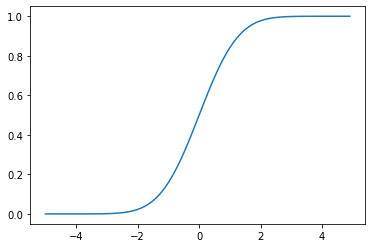

In [302]:
x = np.arange(-5,5,0.1)
y = sps.norm.cdf(x,loc = 0,scale = 1)

F = plt.figure()
A = F.add_subplot('111')

A.plot(x,y,c='purple')
plt.show()

<ipython-input-75-7ec261c4029a>:5: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  A = F.add_subplot('111')


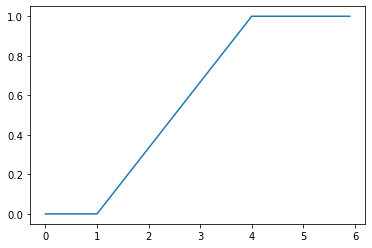

In [75]:
x = np.arange(0,6,0.1)
y = sps.uniform.cdf(x,loc = 1,scale = 3)

F = plt.figure()
A = F.add_subplot('111')

A.plot(x,y,c='purple')
plt.show()

<ipython-input-304-016f05422cae>:5: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  A = F.add_subplot('111')


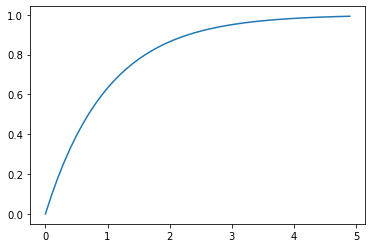

In [304]:
x = np.arange(0,5,0.1)
y = sps.expon.cdf(x,loc = 0,scale = 1)

F = plt.figure()
A = F.add_subplot('111')

A.plot(x,y,c='purple')

plt.show()

<ipython-input-77-19bd645ac2db>:5: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  A = F.add_subplot('111')


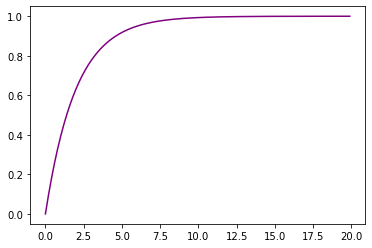

In [77]:
x = np.arange(0,20,0.1)
y = sps.gamma.cdf(x,a = 1, loc = 0,scale = 2)

F = plt.figure()
A = F.add_subplot('111')

A.plot(x,y,c='purple')

plt.show()

<ipython-input-78-cbfff2be4498>:5: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  A = F.add_subplot('111')


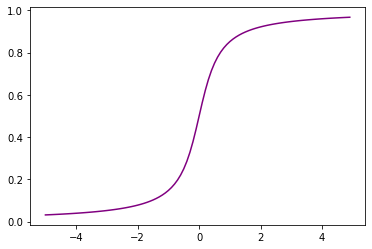

In [78]:
x = np.arange(-5,5,0.1)
y = sps.cauchy.cdf(x,loc = 0,scale = 0.5)

F = plt.figure()
A = F.add_subplot('111')

A.plot(x,y,c='purple')
plt.show()

<ipython-input-92-239e2f6d4d3a>:5: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  A = F.add_subplot('111')


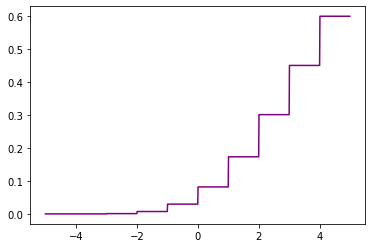

In [92]:
x = np.arange(-5,5,0.01)
y = sps.poisson.cdf(x,loc=-3,mu=7)

F = plt.figure()
A = F.add_subplot('111')

A.plot(x,y,c='purple')
plt.show()

<ipython-input-93-e733fbf3540e>:14: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  A = F.add_subplot('111')


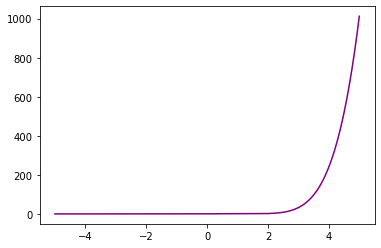

In [93]:
#Я попробовал добавить распределение в Scipy, вот что из этого получилось
class Zadanie(sps.rv_continuous): 
    "kastom_zadanie"
    def _pdf(self, x, k):
        self.k=k
        return k*(x-1)**(k-1)
    
zadanie=Zadanie(name="zadanie",a=0)

x = np.arange(-5,5,0.01)
y = zadanie.cdf(x, k=5)

F = plt.figure()
A = F.add_subplot('111')

A.plot(x,y,c='purple')
plt.show()

**Часть 2.** Теперь необходимо сделать несколько графиков для разных параметров $loc=a$ и $scale=\sigma$.

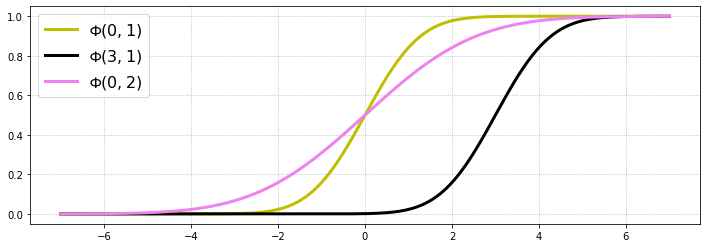

In [94]:
grid = np.linspace(-7, 7, 1000)  # сетка для построения графика
a_list = [0, 3, 0]  # набор значений параметра a
sigma_list = [1, 1, 2]  # набор значений параметра sigma
plt.figure(figsize=(12, 4))
for i, (a, sigma, color) in enumerate(zip(a_list, sigma_list, ['y', 'black', 'violet'])):
    plt.plot(grid, sps.norm(a, sigma).cdf(grid), color=color, lw=3, 
             label='$\mathcal{\Phi}' + '({}, {})$'.format(a, sigma))
plt.legend(fontsize=16)
plt.grid(ls=':')
plt.show()

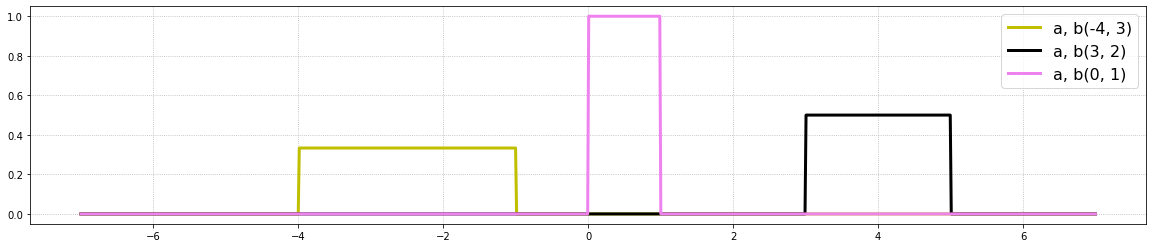

In [95]:
#Непрерывное равномерное распределение
grid = np.linspace(-7, 7, 1000)  # сетка для построения графика
a_list = [-4, 3, 0]  # набор значений параметра a
b_list = [3, 2, 1]  # набор значений параметра b
plt.figure(figsize=(20, 4))
for i, (a, b, color) in enumerate(zip(a_list, b_list, ['y', 'black', 'violet'])):
    plt.plot(grid, sps.uniform(a, b).pdf(grid), color=color, lw=3, 
             label='a, b' + '({}, {})'.format(a, b))
plt.legend(fontsize=16)
plt.grid(ls=':')
plt.show()

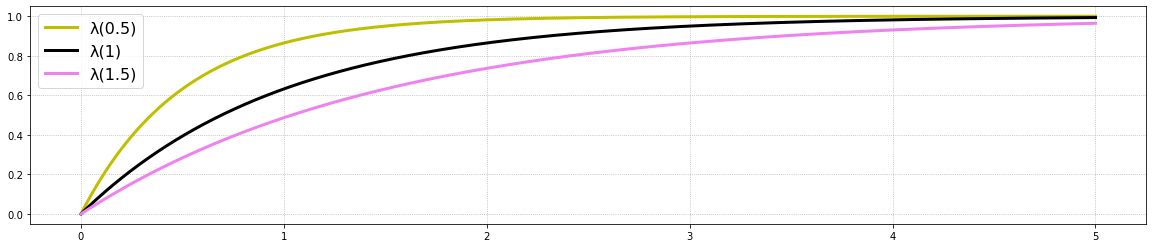

In [106]:
#Экспоненциальное распредление
grid = np.linspace(0, 5, 1000)  # сетка для построения графика
lambda_list = [0.5, 1, 1.5]  # набор значений параметра Лямбда
plt.figure(figsize=(20, 4))
for i, (a, color) in enumerate(zip(lambda_list, ['y', 'black', 'violet'])):
    plt.plot(grid, sps.expon.cdf(grid, 0, a), color=color, lw=3, 
             label='λ' + '({})'.format(a))
plt.legend(fontsize=16)
plt.grid(ls=':')
plt.show()

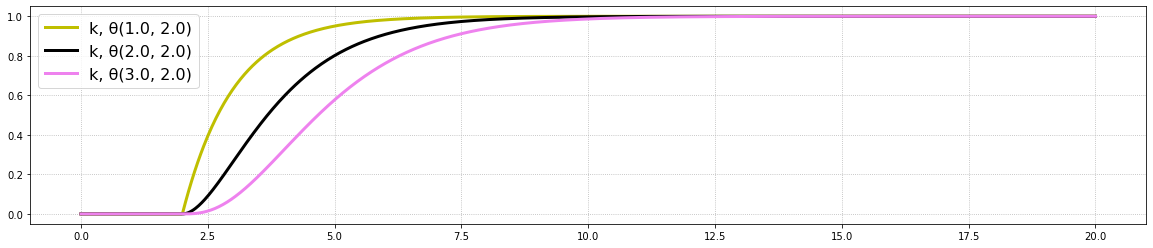

In [107]:
#Гамма-распределение
grid = np.linspace(0, 20, 1000)  # сетка для построения графика
k_list = [1.0, 2.0, 3.0]  # набор значений параметра k
O_list = [2.0, 2.0, 2.0]  # набор значений параметра O
plt.figure(figsize=(20, 4))
for i, (k, O, color) in enumerate(zip(k_list, O_list, ['y', 'black', 'violet'])):
    plt.plot(grid, sps.gamma(k, O).cdf(grid), color=color, lw=3, 
             label='k, θ' + '({}, {})'.format(k, O))
plt.legend(fontsize=16)
plt.grid(ls=':')
plt.show()

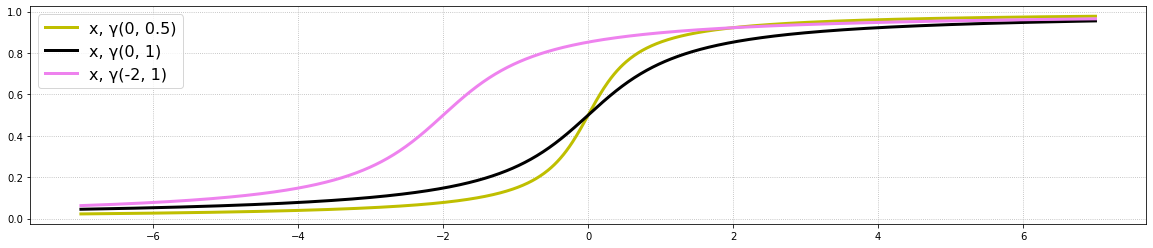

In [108]:
#Распределение Коши
grid = np.linspace(-7, 7, 1000)  # сетка для построения графика
x_list = [0, 0, -2]  # набор значений параметра Х (сдвиг)
gamma_list = [0.5, 1, 1]  # набор значений параметра Гамма
plt.figure(figsize=(20, 4))
for i, (x, gam, color) in enumerate(zip(x_list, gamma_list, ['y', 'black', 'violet'])):
    plt.plot(grid, sps.cauchy(x, gam).cdf(grid), color=color, lw=3, 
             label='x, γ' + '({}, {})'.format(x, gam))
plt.legend(fontsize=16)
plt.grid(ls=':')
plt.show()

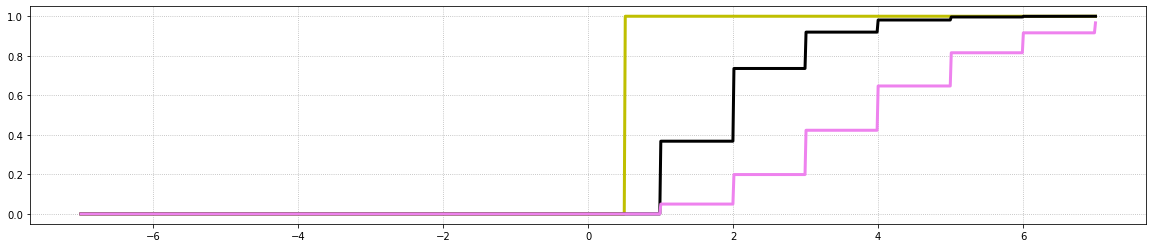

In [109]:
#Распределение Пуассона
grid = np.linspace(-7, 7, 1000)  # сетка для построения графика
a_list = [0, 1, 3]  # набор значений параметра Х (сдвиг)
mu_list = [0.5, 1, 1]  # набор значений параметра Гамма
plt.figure(figsize=(20, 4))
for i, (a, mu, color) in enumerate(zip(a_list, mu_list, ['y', 'black', 'violet'])):
    plt.plot(grid, sps.poisson(a, mu).cdf(grid), color=color, lw=3)
plt.grid(ls=':')
plt.show()

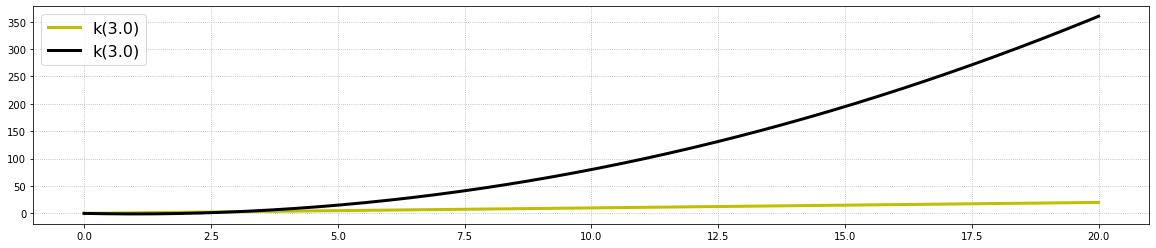

In [103]:
#Заданное дополнительно распределение
grid = np.linspace(0, 20, 1000)  # сетка для построения графика
k_list = [1, 2]  # набор значений параметра k
plt.figure(figsize=(20, 4))
for i, (a, color) in enumerate(zip(k_list, ['y', 'black', 'violet'])):
    plt.plot(grid, zadanie(a).cdf(grid), color=color, lw=3, 
             label='k' + '({})'.format(k))
plt.legend(fontsize=16)
plt.grid(ls=':')
plt.show()

**Часть 3.** Создание виджетов повторяет приемы из задачи 1.

In [111]:
# Нормальное распределение
ip = widgets.interactive(show_pdf,
                         pdf=widgets.fixed(sps.norm.cdf),
                         grid_size=widgets.IntSlider(min=25, max=300, step=25, value=100),
                         xmin=widgets.FloatSlider(min=-10, max=0, step=0.1, value=-5),
                         xmax=widgets.FloatSlider(min=0, max=10, step=0.1, value=5),
                         ymax=widgets.FloatSlider(min=0, max=2, step=0.1, value=1),
                         loc=widgets.FloatSlider(min=-10, max=10, step=0.1, value=0),
                         scale=widgets.FloatSlider(min=0.01, max=2, step=0.01, value=0.5));
display(widgets.HBox(ip.children[:2]))
display(widgets.HBox(ip.children[2:4]))
display(widgets.HBox(ip.children[4:6]))
display(ip.children[-1])
ip.update() 

Output()

In [112]:
# Равномерное распределение
ip = widgets.interactive(show_pdf,
                         pdf=widgets.fixed(sps.uniform.cdf),
                         grid_size=widgets.IntSlider(min=25, max=300, step=25, value=100),
                         xmin=widgets.FloatSlider(min=-10, max=0, step=0.1, value=-5),
                         xmax=widgets.FloatSlider(min=0, max=10, step=0.1, value=5),
                         ymax=widgets.FloatSlider(min=0, max=2, step=0.1, value=1.5),
                         loc=widgets.FloatSlider(min=-10, max=10, step=0.01, value=0),
                         scale=widgets.FloatSlider(min=0.01, max=2, step=0.01, value=1.5));
display(widgets.HBox(ip.children[:2]))
display(widgets.HBox(ip.children[2:4]))
display(widgets.HBox(ip.children[4:6]))
display(ip.children[-1])
ip.update()

Output()

In [115]:
# Экспоненциальное распределение
ip = widgets.interactive(show_pdf,
                         pdf=widgets.fixed(sps.expon.cdf),
                         grid_size=widgets.IntSlider(min=25, max=300, step=25, value=100),
                         xmin=widgets.FloatSlider(min=-10, max=0, step=0.1, value=0),
                         xmax=widgets.FloatSlider(min=0, max=10, step=0.1, value=5),
                         ymax=widgets.FloatSlider(min=0, max=2, step=0.1, value=1),
                         loc=widgets.FloatSlider(min=0, max=10, step=0.1, value=0),
                         scale=widgets.FloatSlider(min=0.01, max=2, step=0.01, value=1.7));
display(widgets.HBox(ip.children[:2]))
display(widgets.HBox(ip.children[2:4]))
display(widgets.HBox(ip.children[4:6]))
display(ip.children[-1])
ip.update()

Output()

In [118]:
# Гамма-распределение
ip = widgets.interactive(show_pdf,
                         pdf=widgets.fixed(sps.gamma.cdf),
                         grid_size=widgets.IntSlider(min=25, max=300, step=25, value=100),
                         xmin=widgets.FloatSlider(min=0, max=10, step=0.1, value=0),
                         xmax=widgets.FloatSlider(min=0, max=10, step=0.1, value=5),
                         ymax=widgets.FloatSlider(min=0, max=1.2, step=0.1, value=1.2),
                         a=widgets.FloatSlider(min=-10, max=10, step=0.1, value=9),
                         loc=widgets.FloatSlider(min=-10, max=10, step=0.1, value=0),
                         scale=widgets.FloatSlider(min=0.01, max=2, step=0.01, value=0.2));
display(widgets.HBox(ip.children[:2]))
display(widgets.HBox(ip.children[2:4]))
display(widgets.HBox(ip.children[4:7]))
display(ip.children[-1])
ip.update()

Output()

In [120]:
# Распределение Коши
ip = widgets.interactive(show_pdf,
                         pdf=widgets.fixed(sps.cauchy.cdf),
                         grid_size=widgets.IntSlider(min=25, max=300, step=25, value=100),
                         xmin=widgets.FloatSlider(min=-10, max=0, step=0.1, value=-5),
                         xmax=widgets.FloatSlider(min=0, max=10, step=0.1, value=5),
                         ymax=widgets.FloatSlider(min=0, max=2, step=0.1, value=1),
                         loc=widgets.FloatSlider(min=-10, max=10, step=0.1, value=0),
                         scale=widgets.FloatSlider(min=0.01, max=2, step=0.01, value=0.7));
display(widgets.HBox(ip.children[:2]))
display(widgets.HBox(ip.children[2:4]))
display(widgets.HBox(ip.children[4:6]))
display(ip.children[-1])
ip.update()

Output()

In [123]:
# Распределение Пуассона
ip = widgets.interactive(show_pdf,
                         pdf=widgets.fixed(sps.poisson.cdf),
                         grid_size=widgets.IntSlider(min=25, max=300, step=25, value=100),
                         xmin=widgets.FloatSlider(min=-10, max=0, step=0.1, value=-5),
                         xmax=widgets.FloatSlider(min=0, max=20, step=0.1, value=20),
                         ymax=widgets.FloatSlider(min=0, max=2, step=0.1, value=1),
                         loc=widgets.FloatSlider(min=-10, max=10, step=0.1, value=6),
                         mu=widgets.FloatSlider(min=0.01, max=2, step=0.01, value=1));
display(widgets.HBox(ip.children[:2]))
display(widgets.HBox(ip.children[2:4]))
display(widgets.HBox(ip.children[4:6]))
display(ip.children[-1])
ip.update()

Output()

In [125]:
# Дополнительное распределение
ip = widgets.interactive(show_pdf,
                         pdf=widgets.fixed(zadanie.cdf),
                         grid_size=widgets.IntSlider(min=25, max=300, step=25, value=100),
                         xmin=widgets.FloatSlider(min=-10, max=0, step=0.1, value=-5),
                         xmax=widgets.FloatSlider(min=0, max=10, step=0.1, value=5),
                         ymax=widgets.FloatSlider(min=0, max=2, step=0.1, value=1),
                         k=widgets.FloatSlider(min=1, max=2, step=1, value=1));
display(widgets.HBox(ip.children[:2]))
display(widgets.HBox(ip.children[2:4]))
display(widgets.HBox(ip.children[4:6]))
display(ip.children[-1])
ip.update()

Output()

**Часть 4.** Найдите в конспекте лекций теорему о том, как связаны вероятность события и функция распределения. Для примера в случае нормального распределения имеем $P(0,1\leq x<0,2)=F(0.2)-F(0.1)=p_1$

In [127]:
p_1=sps.norm.cdf(0.2, loc = 0, scale = 1)-sps.norm.cdf(0.1, loc = 0, scale = 1)
print ('p_1=',p_1)

p_1= 0.039431872162074


In [128]:
UNIFORM=sps.uniform.cdf(0.2, loc = 0, scale = 1)-sps.uniform.cdf(0.1, loc = 0, scale = 1)
print ('P(Непрерывное рамномерное распределение)=',UNIFORM)

P(Непрерывное рамномерное распределение)= 0.1


In [129]:
EXPON=sps.expon.cdf(0.2, loc = 0, scale = 1)-sps.expon.cdf(0.1, loc = 0, scale = 1)
print ('P(Экспоненциальное распределение)=',EXPON)

P(Экспоненциальное распределение)= 0.08610666495797771


In [130]:
GAMMA=sps.gamma.cdf(0.2,a=1,loc = 0, scale = 1)-sps.gamma.cdf(0.1,a=1, loc = 0, scale = 1)
print ('P(Гамма-распределение)=',GAMMA)

P(Гамма-распределение)= 0.08610666495797771


In [131]:
CAUCHY=sps.cauchy.cdf(0.2,loc = 0, scale = 1)-sps.cauchy.cdf(0.1, loc = 0, scale = 1)
print ('P(распределение Коши)=',CAUCHY)

P(распределение Коши)= 0.031107440758447735


In [133]:
POISSON=sps.poisson.cdf(0.2,mu=1,loc = 0)
print ('P(распределение Пауссона)=',POISSON)

P(распределение Пауссона)= 0.36787944117144245


**Задача 3*.** (для сильных студентов)  В этой задаче вам нужно исследовать свойства плотности для двумерного распределения.

Распределение:
Пусть $P —$ вероятностная мера на $(R^2, B(R^2))$, определенная равенством $ P = P_1 ×P_2$, где $P_1$ -равномерное распределение на $[0, 1]$, $P_2 —$ экспоненциальное распределение с параметром $\lambda=3$. 

 1). Постройте плотность распределения $P$ которая имеет вид произведения плотности $P_1$ на плотность $P_2$.
 
 2). Найдите $P(\{(x,y): x+y≤3\})$ либо вручную, тогда присылайте ответ на фото листика с решением, либо через CDF, а лучше и то, и другое, чтобы сравнить результаты.

**Решение задачи 3 (набросок).**

Сначала добавим пакет для трехмерных изображений

In [25]:
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

Теперь приведем пример построения графика произвольной плотности двумерного распределения $z(x,y)=\frac{sin\sqrt(x^2+y^2)}{\sqrt(x^2+y^2)}$

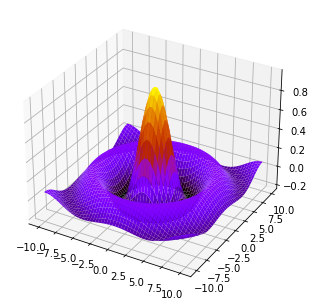

In [26]:
X = 10
N = 50
u = np.linspace(-X, X, N)
x, y = np.meshgrid(u, u)
r = np.sqrt(x ** 2 + y ** 2)
z = np.sin(r) / r

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(x, y, z, rstride=1#это шаг сетки по клеткам влево
                , cstride=1 #это шаг сетки по клеткам вправо
                , cmap='gnuplot'#это выбор раскраски
               )
plt.show()